<h1> Sistemas Inteligentes </h1>
<h1> Práctica de Aprendizaje Supervisado </h1>

En esta práctica vamos a ver cómo se hace el entrenamiento de un método de aprendizaje supervisado en la librería scikit learn para python.

Las tareas a realizar son:
-  Cargar el conjunto de datos
-  Preparar los conjuntos de entrenamiento y prueba
-  Probar el modelo construido con un conjunto de prueba
-  Aplicar métricas de desempeño para evaluar el desempeño del modelo

Mayo de 2020 <br/>
Autor: G. Alvarez

In [1]:
# Documentación
# X_Train : los datos con los que se va entrenar el modelo
# y_train : Las respuestas de ese conjunto de datos (X_Train)
# X_test : son un conjunto de datos diferente para probar el modelo
# y_test : es la respuesta de ese conjunto de datos diferente

In [29]:
# GLOBAR VARIABLES
J = 3 # Número de algoritmos trabajando
M = 4 # Número de métricas trabajando
N = 5 # Número de iteraciones para ejecutar los algoritmos
INDI_METRI = [[] for y in range(M * J)] # Matri con indicadores de las métricas

In [3]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url, header=None, na_values=" ?")

#Ponemos nombre a las columnas (Esta información se toma del archivo original adult.names que está en el 
#repositorio junto con el archivo de datos)
data.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation',
              'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hpw', 'Country', 'C']
#data

In [4]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = data.shape
shape

(32561, 15)

In [5]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(data['C'].value_counts())

 <=50K    24720
 >50K      7841
Name: C, dtype: int64


Las actividades siguientes corresponden al preprocesamiento de los datos para poderlos utilizar en el entrenamiento. Esta es una etapa importante y necesaria, a continuación se muestra la forma cómo se hace, aunque el propósito de la práctica tiene que ver más con la realización del entrenamiento, por lo que no se explicará en detalle.

In [6]:
# Eliminar los registros que tienen más de 2 datos faltantes
data = data.dropna(axis = 0, thresh = 13)
print(data.shape)

# Reemplazar los datos faltantes por la moda en los atributos Workclass, Occupation, Country
data.Workclass.fillna(data.Workclass.mode()[0], inplace=True)
data.Occupation.fillna(data.Workclass.mode()[0], inplace=True)
data.Country.fillna(data.Workclass.mode()[0], inplace=True)

# Convertir los atributos categóricos a escala numérica
# Esto modifica los valores de todas las columnas, incluso las numéricas
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform) 

# Balanceo entre clases
g = data.groupby('C')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
dataBal.shape

(32534, 15)


(15674, 15)

In [7]:
# Separacion de los datos en conjuntos de entrenamiento, validacion y prueba. Se trabaja sobre el conjunto balanceado
# Cuando finalice la depuración recordar quitar el parámetro random_state.
X_train, X_test, y_train, y_test = train_test_split(dataBal.drop(['C'],axis=1), dataBal['C'], test_size=0.4, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (9404, 14)
X_test: (6270, 14)
y_train: (9404,)
y_test: (6270,)


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    """Función para graficar la curva de ROC"""
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [30]:
# Estimación de parámetros
# En este código se ilustra el uso de la función que trae la librería sklearn para estimar paramentros,
# la cual no necesita la extracción explícita del conjunto de validación pues hace la estimación usando
# validación cruzada sobre el conjunto de entrenamiento.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

def SVM_FUN(X_train, X_test, y_train, y_test):
    # Se crea el clasificador base
    clf = SVC()

    # Se definen los valores a explorar para cada parametro a estimar
    parameter_space = [{'kernel': ['rbf', 'sigmoid'], 
    #parameter_space = [{'kernel': ['rbf'], 
                         'gamma': [1e-3, 1e-4],
                         'C': [1, 10, 100],
                        'probability' : [True] 
                        }]

    # Se realiza la estimacion de parametros, en clf queda el modelo construido con los mejores
    # parametros encontrados y reentrenado con el conjunto de datos completo (refit)
    clf = GridSearchCV(clf,parameter_space, n_jobs=-1, cv=3, refit=True)
    clf.fit(X_train,y_train)

    # Se identifican los parametros que producen el mejor modelo
    print("Mejores parametros:")
    print(clf.best_params_)

    # Se hace la prediccion sobre los datos de prueba
    pred = clf.predict(X_test)

    # Se calculan metricas a partir de los datos de prueba
    mat = confusion_matrix(y_test, pred)
    print("Matriz de Confusión")
    print(mat)
    
    # Metricas del algoritmo
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1Score = f1_score(y_test,pred)
    
    # Anexando los valores de las metricas a la mtriz para calcularlos posteriormente
    INDI_METRI[0].append(precision)       # Presición
    INDI_METRI[1].append(recall)       # Recall
    INDI_METRI[2].append(f1Score)   # F1 Score
    
    print("Precision: ", precision)
    print("Recall:    ", recall)
    print("F1score:   ",f1Score)
    print("Reporte",classification_report(y_test, pred))
    
    # CURVA DE ROC
    # Predecir probabilidades para los datos de prueba
    probs = clf.predict_proba(X_test)
    
    # Se mantiene las probabilidades de la clase positiva solamente.
    probs = probs[:, 1]
    
    # Calculo del puntaje AUC
    auc = metrics.roc_auc_score(y_test, probs)
    
    print("AUC: ", auc)
    
    # Se construye la curva de ROC
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    
    # Se grafica
    plot_roc_curve(fpr, tpr)
    
    # Se anexa el valor del area para calcular los indicadores después
    INDI_METRI[3].append(auc)

In [37]:
#Punto 2
# Estimación de parámetros
# En este código se ilustra el uso de la función que trae la librería sklearn para estimar paramentros,
# la cual no necesita la extracción explícita del conjunto de validación pues hace la estimación usando
# validación cruzada sobre el conjunto de entrenamiento.

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

def ArbolDesicion(X_train, X_test, y_train, y_test):
    """Función para trabjar con el algoritmo de Arbol de desición"""
    # Clasificador de arbol de desiciones
    arbol = DecisionTreeClassifier()
    
    # Se definen los valores a explorar para cada parametro a estimar
    parameter_space = {'criterion':['gini','entropy'], 'max_depth' : np.arange(3, 20)}  

    # Se realiza la estimacion de parametros, en arbol queda el modelo construido con los mejores
    # parametros encontrados y reentrenado con el conjunto de datos completo (refit)
    arbol = GridSearchCV(arbol, parameter_space, n_jobs=-1, cv=3, refit=True)
    
    # Entrenamiento del modelo
    arbol.fit(X_train, y_train)
    
    # Se identifican los parametros que producen el mejor modelo
    print("Mejores parametros:")
    print(arbol.best_params_)
    
    # Predicción
    pred = arbol.predict(X_test)
    
    # Matriz de confusión 
    mat = confusion_matrix(y_test, pred)
    print("Matriz de confusión")
    print(mat)
    
    # Metricas del algoritmo
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1Score = f1_score(y_test,pred)
    
    # Anexando los valores de las metricas a la mtriz para calcularlos posteriormente
    INDI_METRI[4].append(precision)       # Presición
    INDI_METRI[5].append(recall)       # Recall
    INDI_METRI[6].append(f1Score)   # F1 Score
    
    print("Precision: ", precision)
    print("Recall:    ", recall)
    print("F1score:   ",f1Score)
    print("Reporte",classification_report(y_test, pred))
    
    # CURVA DE ROC
    # Predecir probabilidades para los datos de prueba
    probs = arbol.predict_proba(X_test)
    
    # Se mantiene las probabilidades de la clase positiva solamente.
    probs = probs[:, 1]
    
    # Calculo del puntaje AUC
    auc = metrics.roc_auc_score(y_test, probs)
    
    print("AUC: ", auc)
    
    # Se construye la curva de ROC
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    
    # Se grafica
    plot_roc_curve(fpr, tpr)
    
    # Se anexa el valor del area para calcular los indicadores después
    INDI_METRI[7].append(auc)

In [39]:
# Estimación de parámetros
# En este código se ilustra el uso de la función que trae la librería sklearn para estimar paramentros,
# la cual no necesita la extracción explícita del conjunto de validación pues hace la estimación usando
# validación cruzada sobre el conjunto de entrenamiento.

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def RegresionLogistica(X_train, X_test, y_train, y_test):
    """Función para trabjar con el algoritmo de regresión logistica"""    
    # Entrenamiento de los modelos
    algoritmo = LogisticRegression()
    
     # Se definen los valores a explorar para cada parametro a estimar
    parameter_space = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000] }

    # Se realiza la estimacion de parametros, en algoritmo queda el modelo construido con los mejores
    # parametros encontrados y reentrenado con el conjunto de datos completo (refit)
    algoritmo = GridSearchCV(algoritmo, parameter_space, n_jobs=-1, cv=3, refit=True)
    
    # Entrenamiento del algoritmo
    algoritmo.fit(X_train,y_train)
    
    # Se identifican los parametros que producen el mejor modelo
    print("Mejores parametros:")
    print(algoritmo.best_params_)
    
    # Se realiza una predicción
    pred = algoritmo.predict(X_test)
    
    # Matriz de confusión 
    mat = confusion_matrix(y_test, pred)
    print("Matriz de confusión")
    print(mat)
    
    # Metricas del algoritmo
    pre = precision_score(y_test,pred)
    rec = recall_score(y_test,pred)
    f1Score = f1_score(y_test,pred)
    
    # Anexando los valores de las metricas a la mtriz para calcularlos posteriormente
    INDI_METRI[8].append(pre)        # Presición
    INDI_METRI[9].append(rec)       # Recall
    INDI_METRI[10].append(f1Score)   # F1 Score
    
    print("Precision: ", pre)
    print("Recall:    ", rec)
    print("F1score:   ",f1Score)
    print("Reporte",classification_report(y_test, pred))
    
    # CURVA DE ROC
    # Predecir probabilidades para los datos de prueba
    probs = algoritmo.predict_proba(X_test)
    
    # Se mantiene las probabilidades de la clase positiva solamente.
    probs = probs[:, 1]
    
    # Calculo del puntaje AUC
    auc = metrics.roc_auc_score(y_test, probs)
    
    print("AUC: ", auc)
    
    # Se construye la curva de ROC
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    
    # Se grafica
    plot_roc_curve(fpr, tpr)
    
    # Se anexa el valor del area para calcular los indicadores después
    INDI_METRI[11].append(auc)

/-------------------------------------/
ITERACION:  1
SVM...
Mejores parametros:
{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf', 'probability': True}
Matriz de Confusión
[[2232  827]
 [ 972 2239]]
Precision:  0.7302674494455317
Recall:     0.6972905636873248
F1score:    0.7133981201210768
Reporte               precision    recall  f1-score   support

           0       0.70      0.73      0.71      3059
           1       0.73      0.70      0.71      3211

    accuracy                           0.71      6270
   macro avg       0.71      0.71      0.71      6270
weighted avg       0.71      0.71      0.71      6270

AUC:  0.7858512678457277


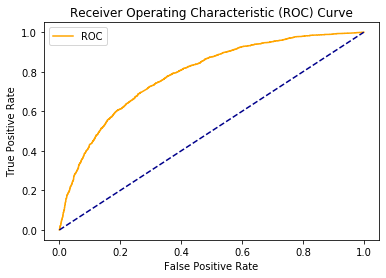

ARBOL DE DECISIÓN...
Mejores parametros:
{'criterion': 'entropy', 'max_depth': 7}
Matriz de confusión
[[2353  706]
 [ 416 2795]]
Precision:  0.7983433304770066
Recall:     0.8704453441295547
F1score:    0.8328367103694875
Reporte               precision    recall  f1-score   support

           0       0.85      0.77      0.81      3059
           1       0.80      0.87      0.83      3211

    accuracy                           0.82      6270
   macro avg       0.82      0.82      0.82      6270
weighted avg       0.82      0.82      0.82      6270

AUC:  0.8958987722919204


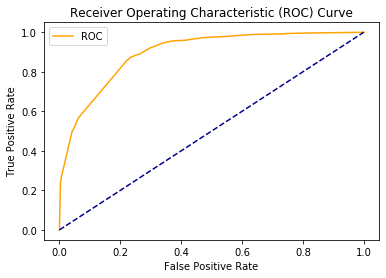

REGRESIÓN LOGISTICA...


c:\users\vospi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Mejores parametros:
{'C': 1000, 'penalty': 'l2'}
Matriz de confusión
[[2272  787]
 [ 808 2403]]
Precision:  0.7532915360501568
Recall:     0.748364995328558
F1score:    0.7508201843461959
Reporte               precision    recall  f1-score   support

           0       0.74      0.74      0.74      3059
           1       0.75      0.75      0.75      3211

    accuracy                           0.75      6270
   macro avg       0.75      0.75      0.75      6270
weighted avg       0.75      0.75      0.75      6270

AUC:  0.8293457161243597


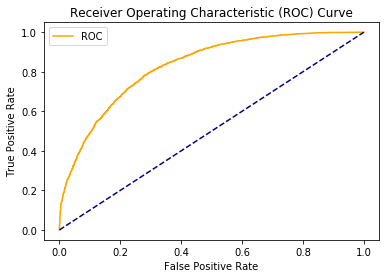

/-------------------------------------/
ITERACION:  2
SVM...
Mejores parametros:
{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf', 'probability': True}
Matriz de Confusión
[[2282  830]
 [ 980 2178]]
Precision:  0.7240691489361702
Recall:     0.6896770107663078
F1score:    0.7064547518650666
Reporte               precision    recall  f1-score   support

           0       0.70      0.73      0.72      3112
           1       0.72      0.69      0.71      3158

    accuracy                           0.71      6270
   macro avg       0.71      0.71      0.71      6270
weighted avg       0.71      0.71      0.71      6270

AUC:  0.7819122101456943


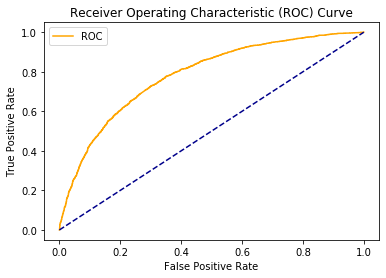

ARBOL DE DECISIÓN...
Mejores parametros:
{'criterion': 'gini', 'max_depth': 9}
Matriz de confusión
[[2359  753]
 [ 419 2739]]
Precision:  0.7843642611683849
Recall:     0.8673210892970235
F1score:    0.8237593984962406
Reporte               precision    recall  f1-score   support

           0       0.85      0.76      0.80      3112
           1       0.78      0.87      0.82      3158

    accuracy                           0.81      6270
   macro avg       0.82      0.81      0.81      6270
weighted avg       0.82      0.81      0.81      6270

AUC:  0.8815306761625512


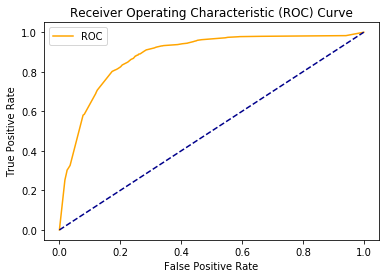

REGRESIÓN LOGISTICA...


c:\users\vospi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Mejores parametros:
{'C': 1, 'penalty': 'l2'}
Matriz de confusión
[[2274  838]
 [ 832 2326]]
Precision:  0.7351453855878635
Recall:     0.7365421152628245
F1score:    0.7358430876304967
Reporte               precision    recall  f1-score   support

           0       0.73      0.73      0.73      3112
           1       0.74      0.74      0.74      3158

    accuracy                           0.73      6270
   macro avg       0.73      0.73      0.73      6270
weighted avg       0.73      0.73      0.73      6270

AUC:  0.8164458892501355


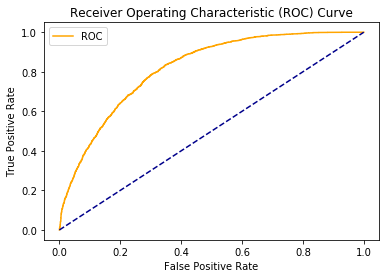

/-------------------------------------/
ITERACION:  3
SVM...
Mejores parametros:
{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf', 'probability': True}
Matriz de Confusión
[[2200  898]
 [ 907 2265]]
Precision:  0.7160923174201708
Recall:     0.7140605296343001
F1score:    0.7150749802683504
Reporte               precision    recall  f1-score   support

           0       0.71      0.71      0.71      3098
           1       0.72      0.71      0.72      3172

    accuracy                           0.71      6270
   macro avg       0.71      0.71      0.71      6270
weighted avg       0.71      0.71      0.71      6270

AUC:  0.7763409782335265


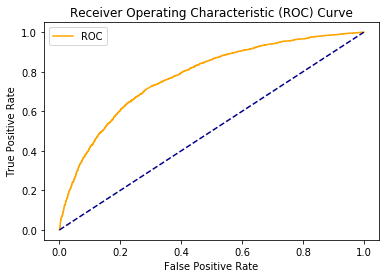

ARBOL DE DECISIÓN...
Mejores parametros:
{'criterion': 'entropy', 'max_depth': 9}
Matriz de confusión
[[2362  736]
 [ 413 2759]]
Precision:  0.7894134477825465
Recall:     0.869798234552333
F1score:    0.8276586170691467
Reporte               precision    recall  f1-score   support

           0       0.85      0.76      0.80      3098
           1       0.79      0.87      0.83      3172

    accuracy                           0.82      6270
   macro avg       0.82      0.82      0.82      6270
weighted avg       0.82      0.82      0.82      6270

AUC:  0.8901349017427344


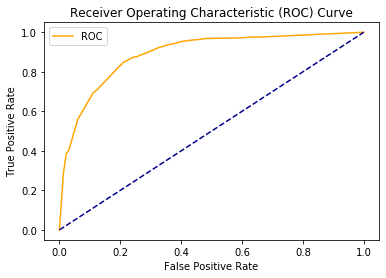

REGRESIÓN LOGISTICA...


c:\users\vospi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Mejores parametros:
{'C': 1000, 'penalty': 'l2'}
Matriz de confusión
[[2262  836]
 [ 846 2326]]
Precision:  0.7356103731815307
Recall:     0.7332912988650694
F1score:    0.7344490053678561
Reporte               precision    recall  f1-score   support

           0       0.73      0.73      0.73      3098
           1       0.74      0.73      0.73      3172

    accuracy                           0.73      6270
   macro avg       0.73      0.73      0.73      6270
weighted avg       0.73      0.73      0.73      6270

AUC:  0.8073349197342465


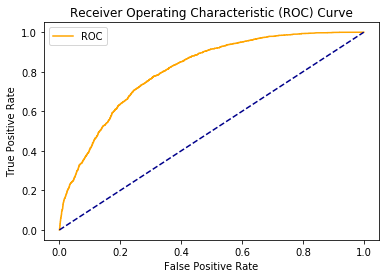

/-------------------------------------/
ITERACION:  4
SVM...
Mejores parametros:
{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf', 'probability': True}
Matriz de Confusión
[[2193  915]
 [ 897 2265]]
Precision:  0.7122641509433962
Recall:     0.7163187855787476
F1score:    0.7142857142857143
Reporte               precision    recall  f1-score   support

           0       0.71      0.71      0.71      3108
           1       0.71      0.72      0.71      3162

    accuracy                           0.71      6270
   macro avg       0.71      0.71      0.71      6270
weighted avg       0.71      0.71      0.71      6270

AUC:  0.777396805859804


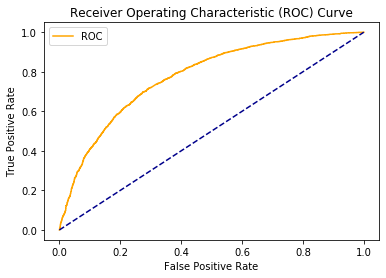

ARBOL DE DECISIÓN...
Mejores parametros:
{'criterion': 'gini', 'max_depth': 8}
Matriz de confusión
[[2386  722]
 [ 454 2708]]
Precision:  0.7895043731778426
Recall:     0.8564199873497786
F1score:    0.8216019417475728
Reporte               precision    recall  f1-score   support

           0       0.84      0.77      0.80      3108
           1       0.79      0.86      0.82      3162

    accuracy                           0.81      6270
   macro avg       0.81      0.81      0.81      6270
weighted avg       0.81      0.81      0.81      6270

AUC:  0.8899822498019841


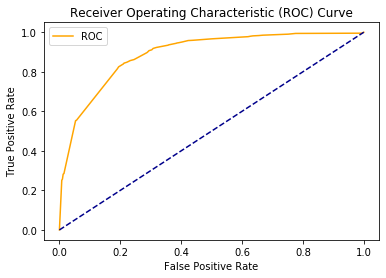

REGRESIÓN LOGISTICA...


c:\users\vospi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Mejores parametros:
{'C': 0.01, 'penalty': 'l2'}
Matriz de confusión
[[2316  792]
 [ 782 2380]]
Precision:  0.7503152585119798
Recall:     0.7526881720430108
F1score:    0.7514998421218819
Reporte               precision    recall  f1-score   support

           0       0.75      0.75      0.75      3108
           1       0.75      0.75      0.75      3162

    accuracy                           0.75      6270
   macro avg       0.75      0.75      0.75      6270
weighted avg       0.75      0.75      0.75      6270

AUC:  0.8289126752124855


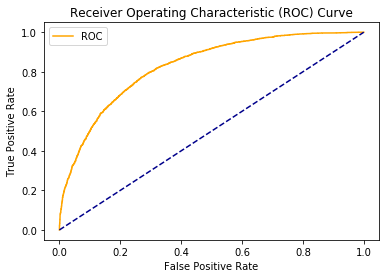

/-------------------------------------/
ITERACION:  5
SVM...


In [ ]:
from numpy import average
from statistics import stdev

def main(sizeTest):
    for i in range(N): # Llamado del agente para revisar las metricas
        X_train, X_test, y_train, y_test = train_test_split(dataBal.drop(['C'],axis=1), dataBal['C']
                                                        , test_size=sizeTest)
        print("/-------------------------------------/")
        print("ITERACION: ", i + 1)
        print("SVM...")
        SVM_FUN(X_train, X_test, y_train, y_test)
        print("ARBOL DE DECISIÓN...")
        ArbolDesicion(X_train, X_test, y_train, y_test)
        print("REGRESIÓN LOGISTICA...")
        RegresionLogistica(X_train, X_test, y_train, y_test)
        
    print("Resultados después de las {0} iteraciones".format(N))
    print("PROMEDIOS")
    print("            |      SVM       |    ARBOLES DE DESICIÓN      |    REGRESIÓN LOGISTICA     |")
    print("RECALL      |   {:.7f}    |         {:.7f}           |         {:.7f}          |".format(average(INDI_METRI[0]), average(INDI_METRI[4]), average(INDI_METRI[8])))     
    print("PRECISION   |   {:.7f}    |         {:.7f}           |         {:.7f}          |".format(average(INDI_METRI[1]), average(INDI_METRI[5]), average(INDI_METRI[9])))
    print("F1          |   {:.7f}    |         {:.7f}           |         {:.7f}          |".format(average(INDI_METRI[2]), average(INDI_METRI[6]), average(INDI_METRI[10])))
    print("AUC         |   {:.7f}    |         {:.7f}           |         {:.7f}          |".format(average(INDI_METRI[3]), average(INDI_METRI[7]), average(INDI_METRI[11])))
    print("\n\n")
    print("DESVIACIÓN ESTÁNDAR")
    print("            |      SVM       |    ARBOLES DE DESICIÓN      |    REGRESIÓN LOGISTICA     |")
    print("RECALL      |   {:.7f}    |         {:.7f}           |         {:.7f}          |".format(stdev(INDI_METRI[0]), stdev(INDI_METRI[4]), stdev(INDI_METRI[8])))     
    print("PRECISION   |   {:.7f}    |         {:.7f}           |         {:.7f}          |".format(stdev(INDI_METRI[1]), stdev(INDI_METRI[5]), stdev(INDI_METRI[9])))
    print("F1          |   {:.7f}    |         {:.7f}           |         {:.7f}          |".format(stdev(INDI_METRI[2]), stdev(INDI_METRI[6]), stdev(INDI_METRI[10])))
    print("AUC         |   {:.7f}    |         {:.7f}           |         {:.7f}          |".format(stdev(INDI_METRI[3]), stdev(INDI_METRI[7]), stdev(INDI_METRI[11])))    
main(0.4)

<h1> Actividades a realizar a partir de este script básico: </h1>
1.  Implementar el método holdout para obtener unas métricas de desempeño más confiables. Hacer 5 iteraciones  de las etapas de: partición de los datos - entrenamiento - prueba - calculo de metricas. No olvidar liberar la semilla del generador de números aleatorios.
<br></br>
2.  Adicionar dos métodos para poder comparar su desempeño, los métodos a adicionar son: árbol de decisiones y clasificacador por regresión logística.
<br></br>
3.  Mostrar los resultados comparativos gráficamente, incluyendo la visualización de las curvas ROC por cada método y el valor del área bajo la curva.